# Monte Carlo Methods

### Last Class
- Monte Carlo Introduction

### Goals for Today
- Define kernel density
- Implement a kernel density function to appoximate a probability distribution
- Discuss the advantages and disadvantages of various kernels
- Apply a kernel density function to a mathematical model

### Pre-Lecture Activities
- [MATH 360 > Kernel Density](https://ubcmath.github.io/MATH360/stochastic/kernel.html)

Comment about syntax: When we write $X \sim N(\mu,\sigma^2)$ it means that the random variable $X$ is normally distributed with mean $\mu$ and variance $\sigma^2$.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
%matplotlib inline


print("packages imported")

packages imported


### Relation to Histograms

Let's first look at how Kernel density and histograms are related.  
1. Plot a histogram for the data: $[-1.5, -1.2, -0.8, -0.3, 0.4, 0.9].$
2. Use a Gaussian Kernel to form a kernel density for the data points.  Plot the function on the same plot as the data. How does the function "change" when it is near each data point?

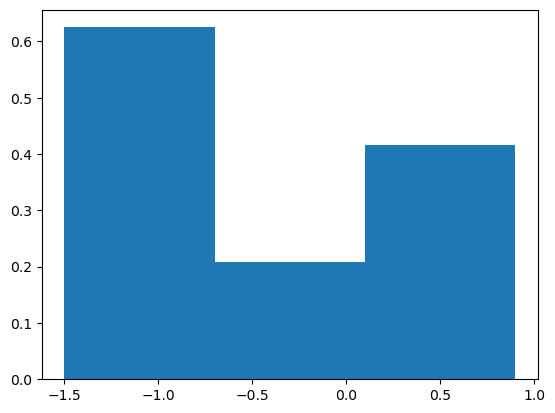

In [2]:
X = np.array([-1.5, -1.2, -0.8, -0.3, 0.4, 0.9])
plt.hist(X, bins=3, density=True)
plt.show()

**notes:**
- histograms are bad because the *bin* sizing messes up the viewed distribution 
- especially important when we do not have lots of data

**kernal density estimation** gives a way for us to use the actual datapoints to describe the density functions. normally we cannot compute the pdf of a random variable.

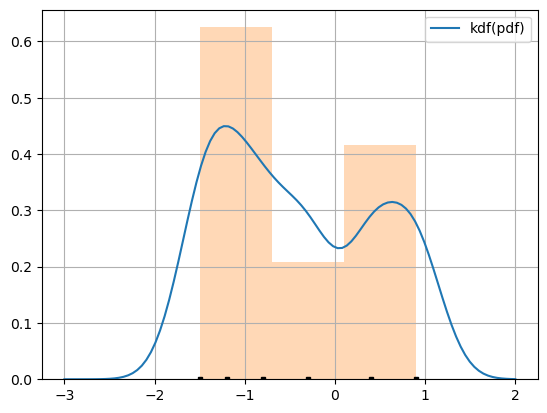

In [3]:
# choose gaussian kernal
K = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
fh = lambda x,h: 1/(len(X)*h)*sum([K((x - X[i])/h) for i in range(len(X))])
x = np.linspace(-3,2,100)
h = 0.3

plt.plot(X, np.zeros_like(X), 's', markersize = 3, color='black') # <- black dot on the x axis where each datapoint is 
plt.plot(x, fh(x,h), label='kdf(pdf)')
plt.legend()
plt.grid()
plt.hist(X, bins=3, density=True, alpha=0.3, label='histogram')
plt.show()

### Transit Travel Time 3

Let's suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Find the kernel density function using a Gaussian kernel, and then use the function to determine the probability that the time to reach campus is less than 30 minutes.

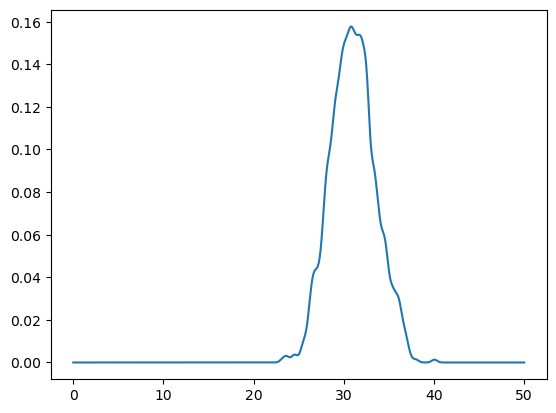

In [4]:
N = 1000
h = 0.3
X1 = np.random.normal(loc=11, scale=np.sqrt(2), size=N)
X2 = np.random.normal(loc=20, scale=np.sqrt(4), size=N)
Y = X1 + X2

x = np.linspace(0, 50, N)
K = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
fh = lambda x,h: 1/(N*h) * sum([K((x-Y[i])/h) for i in range(N)])

plt.plot(x, fh(x,h), label='kdf(pdf) of Y')

In [9]:
# Probability that we reach campus in less than or equal to 30 minutes
import scipy.integrate as spi

prob, err = spi.quad(fh, -np.inf, 30, args=(h,))
print(prob*100, "%")

35.38115268212901 %


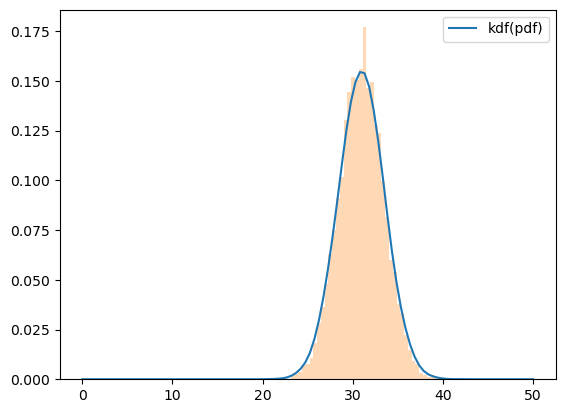

In [6]:
N = 10000

# bus trips
X1 = np.random.normal(loc = 11, scale = np.sqrt(2), size = N) #normally distributed with mean 11 and variance 2
X2 = np.random.normal(loc = 20, scale = np.sqrt(4), size = N) #normally distributed with mean 20 and variance 4

#total time on the bus
Y = X1 + X2

K = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

fh = lambda x, h: 1/(len(Y)*h)*sum([K((x - Y[i])/h) for i in range(len(Y))])

x = np.linspace(0,50,100)
h = 0.8

def fh_callable(x,h):
    return 1/(len(Y)*h)*sum([K((x - Y[i])/h) for i in range(len(Y))])


plt.plot(x, fh(x,h), label='kdf(pdf)')
plt.legend()
plt.hist(Y, bins=50, density=True, alpha=0.3, label='histogram')
plt.show()

In [7]:
import scipy.integrate as spi

spi.quad(fh_callable, -np.inf, 30)

TypeError: fh_callable() missing 1 required positional argument: 'h'

In [8]:
import scipy

prob = scipy.integrate.trapezoid(Y, np.linspace(0,30,N))
prob


928.8690292638066

### Transit Travel Time 4

Let's again suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Between getting off of the first bus and getting on the second bus, we have to wait an average of 5 minutes.  Assume that the wait time is exponentially distributed.  

Find the kernel density function using a Gaussian kernel, a Triangular kernel, and a Rectangular kernel, and then use the functions to determine the probability that the time to reach campus is less than 30 minutes.  What differences do you observe when a different kernel function is chosen? Use $h=0.3$ as the bandwidth for both kernels.

Discuss the advantages and disadvantages to each of the kernel functions.

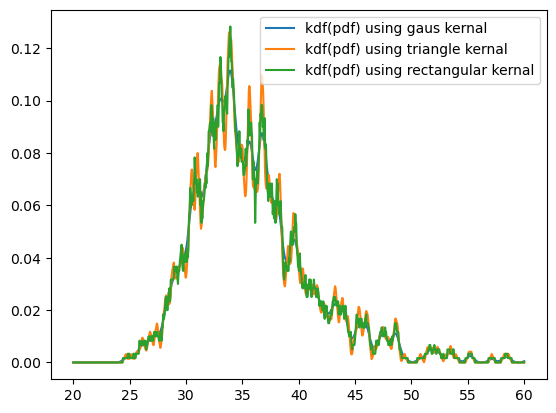

/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_61089/1176061896.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  prob, err = spi.quad(fh, -np.inf, 30, args=(h,))


Kernal: gaus, Probability: 8.70595841517499%
Kernal: triangle, Probability: 8.70595841517499%
Kernal: rectangular, Probability: 8.70595841517499%


In [17]:
N = 1000
X1 = np.random.normal(loc=11, scale=np.sqrt(2), size=N)
X2 = np.random.normal(loc=20, scale=np.sqrt(4), size=N)
X3 = np.random.exponential(scale=5, size=N)
Y = X1 + X2 + X3

x = np.linspace(20, 60, N)
h = 0.3
gausK = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
triK = lambda x: (1-abs(x)) * (np.heaviside(x+1, 1) - np.heaviside(x-1, 1))
rectK = lambda x: 1/2 * (np.heaviside(x+1, 1) - np.heaviside(x-1, 1))

kernals = [("gaus", gausK), ("triangle", triK), ("rectangular", rectK)]

fh_kernals = []
for kernal, K in kernals:
    fh = lambda x,h: 1/(N*h) * sum([K((x-Y[i])/h) for i in range(N)])
    fh_kernals.append((kernal, fh))
    plt.plot(x, fh(x,h), label=f'kdf(pdf) using {kernal} kernal')
plt.legend()
plt.show()

for kernal, fh in fh_kernals:
    prob, err = spi.quad(fh, -np.inf, 30, args=(h,))
    print(f'Kernal: {kernal}, Probability: {prob*100}%')

In [ ]:
N = 1000

# bus trips
X1 = np.random.normal(loc = 11, scale = np.sqrt(2), size = N) #normally distributed with mean 11 and variance 2
X2 = np.random.normal(loc = 20, scale = np.sqrt(4), size = N) #normally distributed with mean 20 and variance 4
X3 = np.random.exponential(5)

#total time on the bus
Y = X1 + X2 + X3
h = 0.3

u = lambda x: np.heaviside(x + 1,1) - np.heaviside(x - 1,1)

K1 = lambda x: (1 - np.abs(x))*u(x) # triangle
K2 = lambda x: 0.5*u(x) # rectangle
K3 = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2) # gaussian

fh1 = lambda x, h: 1/(len(Y)*h)*sum([K1((x - Y[i])/h) for i in range(len(Y))])
fh2 = lambda x, h: 1/(len(Y)*h)*sum([K2((x - Y[i])/h) for i in range(len(Y))])
fh3 = lambda x, h: 1/(len(Y)*h)*sum([K3((x - Y[i])/h) for i in range(len(Y))])

x = np.linspace(0, 50, 1000)
plt.plot(x, fh1(x,h), label='triangle')
plt.plot(x, fh2(x,h), label='rectangular')
plt.plot(x, fh3(x,h), label='guassian')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(spi.trapezoid(fh1(x,h), np.linspace(0, 30, N)))
print(spi.trapezoid(fh2(x,h), np.linspace(0, 30, N)))
print(spi.trapezoid(fh3(x,h), np.linspace(0, 30, N)))

### Kernel Density Estimation Using SciPy

Using the `scipy.stats.gaussian_kde` function, determine the probability density functions for the previous two Transit Travel Time Examples.  Experiment with different bandwidths.  How do the density functions change when the bandwith changes?